climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
EBM with interactive ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210.0, 'B': 2.0, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}
climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and d

Total elapsed time is 5.000000000000044 years.
Integrating for 450 steps, 1826.2110000000002 days, or 5 years.


Total elapsed time is 9.999999999999863 years.
1.2815863495813735e-05


array([-70.,  70.])

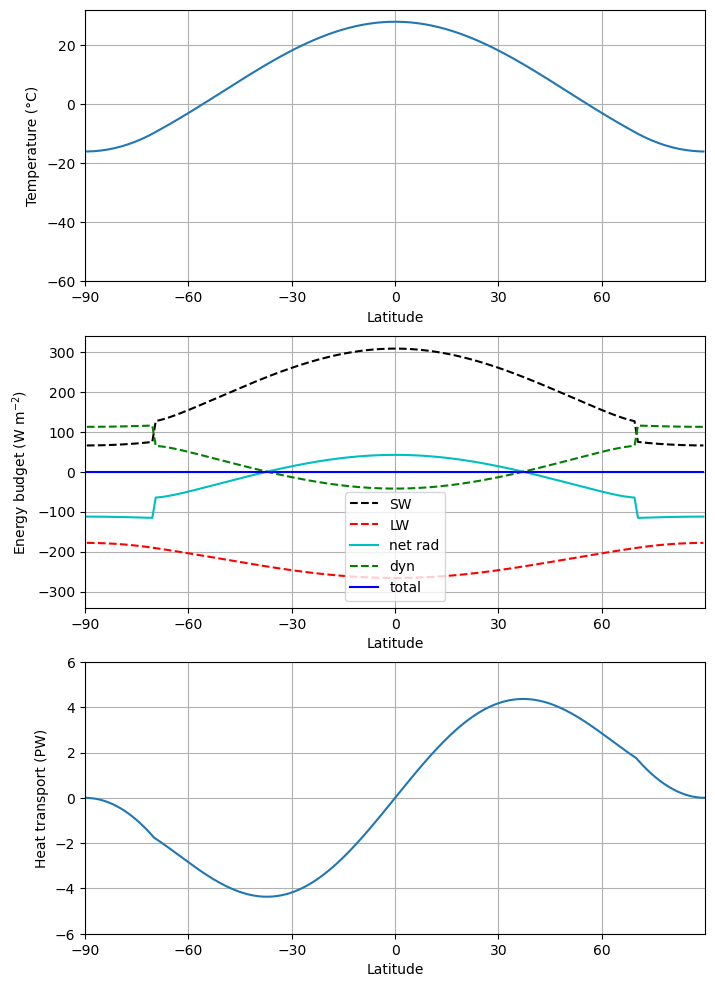

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const

#  for convenience, set up a dictionary with our reference parameters
param = {'D':0.55, 'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180, 
                            D=0.55, 
                            A=210., 
                            B=2., 
                            Tf=-10., 
                            a0=0.3, 
                            a2=0.078, 
                            ai=0.62)
print(model1)

print(model1.param)

#  A python shortcut... we can use the dictionary to pass lots of input arguments simultaneously:

#  same thing as before, but written differently:
model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,
                            **param)
print(model1)

def ebm_plot(e, return_fig=False):    
    templimits = -60,32
    radlimits = -340, 340
    htlimits = -6,6
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    fig = plt.figure(figsize=(8,12))

    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(e.lat, e.Ts)
    ax1.set_ylim(templimits)
    ax1.set_ylabel('Temperature (°C)')
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(e.lat, e.ASR, 'k--', label='SW' )
    ax2.plot(e.lat, -e.OLR, 'r--', label='LW' )
    ax2.plot(e.lat, e.net_radiation, 'c-', label='net rad' )
    ax2.plot(e.lat, e.heat_transport_convergence, 'g--', label='dyn' )
    ax2.plot(e.lat, e.net_radiation + e.heat_transport_convergence, 'b-', label='total' )
    ax2.set_ylim(radlimits)
    ax2.set_ylabel('Energy budget (W m$^{-2}$)')
    ax2.legend()
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(e.lat_bounds, e.heat_transport )
    ax3.set_ylim(htlimits)
    ax3.set_ylabel('Heat transport (PW)')
    
    for ax in [ax1, ax2, ax3]:
        ax.set_xlabel('Latitude')
        ax.set_xlim(latlimits)
        ax.set_xticks(lat_ticks)
        ax.grid()
    
    if return_fig:
        return fig

model1.integrate_years(5)

model1.ASR.to_xarray()

climlab.global_mean(model1.ASR - model1.OLR)

# Integrate out to equilibrium.
model1.integrate_years(5)
#  Check for energy balance
print(climlab.global_mean(model1.net_radiation))
f = ebm_plot(model1)

#  There is a diagnostic that tells us the current location of the ice edge:
model1.icelat


array([-90.,  90.])

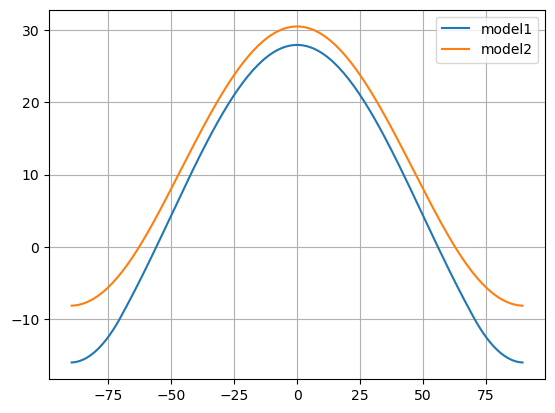

In [2]:
model1.subprocess['LW'].A

deltaA = 4.

#  This is a very handy way to "clone" an existing model:
model2 = climlab.process_like(model1)

#  Now change the longwave parameter:
model2.subprocess['LW'].A = param['A'] - deltaA
#  and integrate out to equilibrium again
model2.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts, label='model1')
plt.plot(model2.lat, model2.Ts, label='model2')
plt.legend(); plt.grid()

model2.icelat


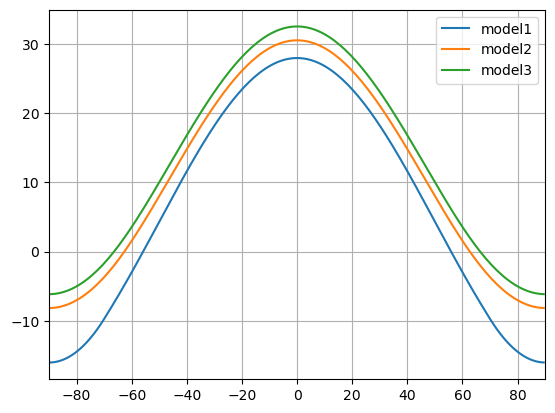

In [3]:
model3 = climlab.process_like(model1)
model3.subprocess['LW'].A = param['A'] - 2*deltaA
model3.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts, label='model1')
plt.plot(model2.lat, model2.Ts, label='model2')
plt.plot(model3.lat, model3.Ts, label='model3')
plt.xlim(-90, 90)
plt.grid()
plt.legend()
